In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

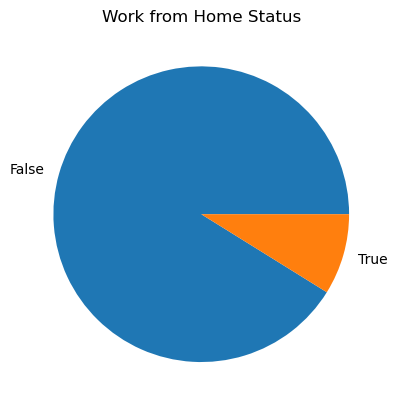

In [4]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

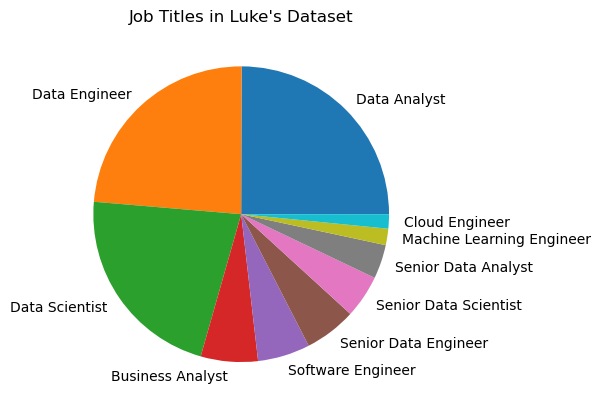

In [5]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles in Luke's Dataset")
plt.ylabel('')
plt.show()

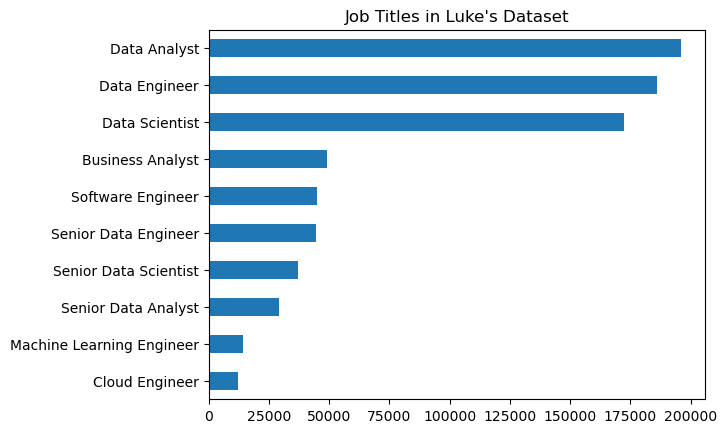

In [6]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles in Luke's Dataset")
plt.gca().invert_yaxis()
plt.ylabel('')
plt.show()

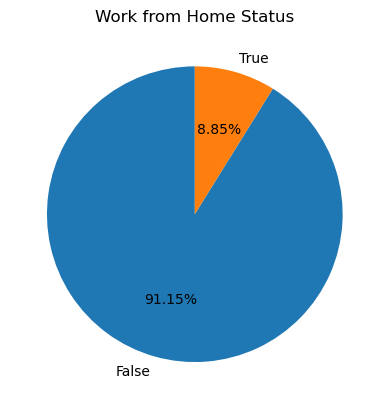

In [7]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [8]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


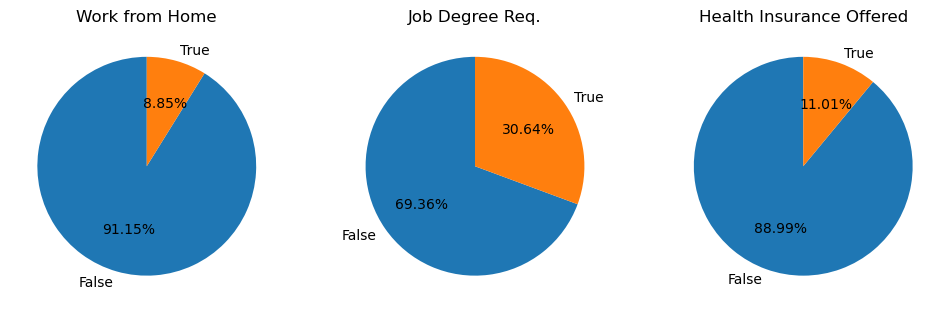

In [9]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.2f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()